In [1]:
%matplotlib inline

import math
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Number of epoch
NP_EPOCH = 20

In [4]:
# Load data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


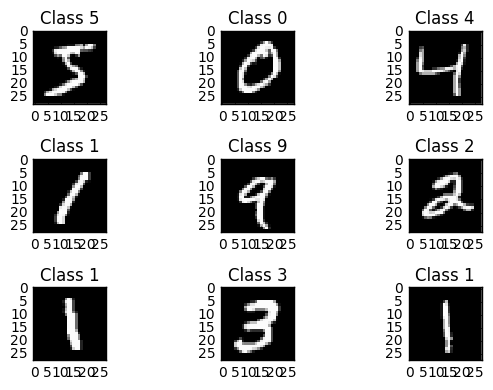

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [7]:
# Take only 10000 out of 60000

X_train = X_train[0:10000]
X_test = X_test[0:1000]
Y_train = Y_train[0:10000]
Y_test = Y_test[0:1000]

# Table of Content
- Basic Model
- With Cross Entropy
- Deeper Model
- Deeper Model with ReLU
- Adam (Adaptive Learning Rate + Momentum)
- Dropout

# Basic Model

In [8]:
model = Sequential()

# input layer
model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

# hidden layer
model.add(Dense(output_dim=500, activation='sigmoid'))

# output layer
model.add(Dense(output_dim=10, activation='softmax'))

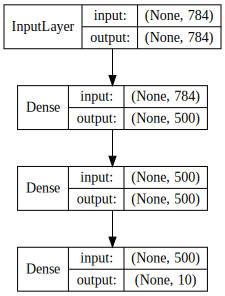

In [9]:
SVG(model_to_dot(model,
                 show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [10]:
model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [11]:
def train_and_show_result(model):
    training_history = model.fit(X_train, Y_train,
                                 batch_size=100, nb_epoch=NP_EPOCH,
                                 verbose=2)

    score = model.evaluate(X_test, Y_test)
    print("\n--------------------\nTotal Testing Loss: ", score[1], "\nTesting Accuracy: ", score[1])
    return training_history

In [12]:
def plot_training_history(training_history):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_xlabel('Epoch')
    axarr[0].set_ylabel('Training Accuracy')
    axarr[0].plot(list(range(1, NP_EPOCH+1)), training_history.history['acc'])
    axarr[1].set_ylabel('Training Error')
    axarr[1].plot(list(range(1, NP_EPOCH+1)), training_history.history['loss'])

In [13]:
%%time
history = train_and_show_result(model)

Epoch 1/20
1s - loss: 0.0907 - acc: 0.1180
Epoch 2/20
1s - loss: 0.0899 - acc: 0.1179
Epoch 3/20
1s - loss: 0.0898 - acc: 0.1275
Epoch 4/20
1s - loss: 0.0897 - acc: 0.1269
Epoch 5/20
1s - loss: 0.0897 - acc: 0.1278
Epoch 6/20
1s - loss: 0.0896 - acc: 0.1421
Epoch 7/20
1s - loss: 0.0895 - acc: 0.1327
Epoch 8/20
1s - loss: 0.0894 - acc: 0.1533
Epoch 9/20
1s - loss: 0.0894 - acc: 0.1604
Epoch 10/20
1s - loss: 0.0893 - acc: 0.1872
Epoch 11/20
1s - loss: 0.0892 - acc: 0.1637
Epoch 12/20
1s - loss: 0.0891 - acc: 0.1959
Epoch 13/20
1s - loss: 0.0891 - acc: 0.1907
Epoch 14/20
1s - loss: 0.0890 - acc: 0.1849
Epoch 15/20
1s - loss: 0.0889 - acc: 0.2406
Epoch 16/20
1s - loss: 0.0888 - acc: 0.1988
Epoch 17/20
1s - loss: 0.0887 - acc: 0.2617
Epoch 18/20
1s - loss: 0.0886 - acc: 0.2173
Epoch 19/20
1s - loss: 0.0886 - acc: 0.2425
Epoch 20/20
1s - loss: 0.0885 - acc: 0.2635
 928/1000 [==========================>...] - ETA: 0s
--------------------
Total Testing Loss:  0.198 
Testing Accuracy:  0.198
CP

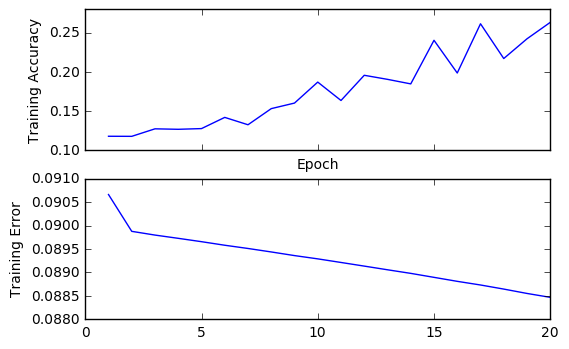

In [14]:
plot_training_history(history)

# Cross Entropy

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [16]:
%%time
history = train_and_show_result(model)

Epoch 1/20
1s - loss: 2.2509 - acc: 0.1867
Epoch 2/20
1s - loss: 1.8913 - acc: 0.3678
Epoch 3/20
1s - loss: 1.3375 - acc: 0.6089
Epoch 4/20
1s - loss: 0.9668 - acc: 0.7240
Epoch 5/20
1s - loss: 0.7691 - acc: 0.7845
Epoch 6/20
1s - loss: 0.6468 - acc: 0.8200
Epoch 7/20
1s - loss: 0.5700 - acc: 0.8456
Epoch 8/20
1s - loss: 0.5178 - acc: 0.8573
Epoch 9/20
1s - loss: 0.4760 - acc: 0.8673
Epoch 10/20
1s - loss: 0.4443 - acc: 0.8792
Epoch 11/20
1s - loss: 0.4211 - acc: 0.8820
Epoch 12/20
1s - loss: 0.4039 - acc: 0.8883
Epoch 13/20
1s - loss: 0.3875 - acc: 0.8907
Epoch 14/20
1s - loss: 0.3719 - acc: 0.8973
Epoch 15/20
1s - loss: 0.3623 - acc: 0.8989
Epoch 16/20
1s - loss: 0.3522 - acc: 0.9008
Epoch 17/20
1s - loss: 0.3448 - acc: 0.9046
Epoch 18/20
1s - loss: 0.3369 - acc: 0.9071
Epoch 19/20
1s - loss: 0.3309 - acc: 0.9072
Epoch 20/20
1s - loss: 0.3246 - acc: 0.9116
1000/1000 [==============================] - 0s     

--------------------
Total Testing Loss:  0.886 
Testing Accuracy:  0.886
C

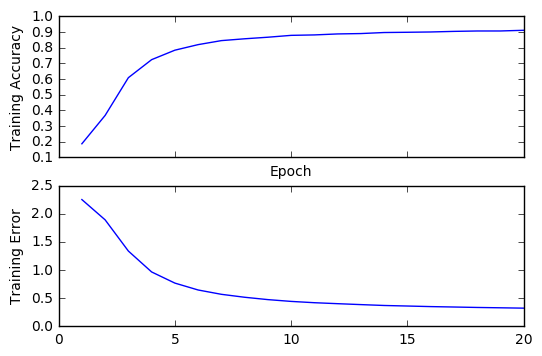

In [17]:
plot_training_history(history)

# Deeper

In [18]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [20]:
%%time
history = train_and_show_result(model)

Epoch 1/20
5s - loss: 2.4037 - acc: 0.0983
Epoch 2/20
5s - loss: 2.3664 - acc: 0.1034
Epoch 3/20
5s - loss: 2.3439 - acc: 0.1017
Epoch 4/20
5s - loss: 2.3392 - acc: 0.0986
Epoch 5/20
5s - loss: 2.3285 - acc: 0.1048
Epoch 6/20
5s - loss: 2.3243 - acc: 0.1015
Epoch 7/20
5s - loss: 2.3224 - acc: 0.1011
Epoch 8/20
5s - loss: 2.3174 - acc: 0.1084
Epoch 9/20
5s - loss: 2.3163 - acc: 0.1055
Epoch 10/20
4s - loss: 2.3148 - acc: 0.1051
Epoch 11/20
5s - loss: 2.3132 - acc: 0.1014
Epoch 12/20
5s - loss: 2.3134 - acc: 0.0983
Epoch 13/20
5s - loss: 2.3105 - acc: 0.1075
Epoch 14/20
5s - loss: 2.3098 - acc: 0.1040
Epoch 15/20
5s - loss: 2.3099 - acc: 0.1001
Epoch 16/20
4s - loss: 2.3070 - acc: 0.1096
Epoch 17/20
5s - loss: 2.3083 - acc: 0.1063
Epoch 18/20
5s - loss: 2.3079 - acc: 0.1075
Epoch 19/20
5s - loss: 2.3074 - acc: 0.1048
Epoch 20/20
6s - loss: 2.3063 - acc: 0.1042
1000/1000 [==============================] - 0s     

--------------------
Total Testing Loss:  0.11 
Testing Accuracy:  0.11
CPU

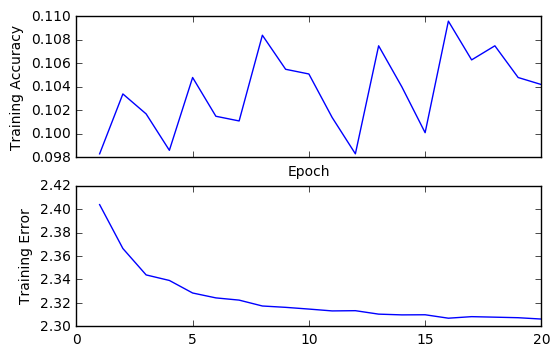

In [21]:
plot_training_history(history)

# ReLU

In [22]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [24]:
%%time
history = train_and_show_result(model)

Epoch 1/20
4s - loss: 1.8906 - acc: 0.3519
Epoch 2/20
5s - loss: 0.7199 - acc: 0.7616
Epoch 3/20
6s - loss: 0.3613 - acc: 0.8917
Epoch 4/20
6s - loss: 0.2327 - acc: 0.9319
Epoch 5/20
6s - loss: 0.1754 - acc: 0.9493
Epoch 6/20
5s - loss: 0.1089 - acc: 0.9683
Epoch 7/20
5s - loss: 0.0762 - acc: 0.9771
Epoch 8/20
5s - loss: 0.3100 - acc: 0.9236
Epoch 9/20
5s - loss: 0.2641 - acc: 0.9255
Epoch 10/20
5s - loss: 0.1295 - acc: 0.9685
Epoch 11/20
5s - loss: 0.1079 - acc: 0.9746
Epoch 12/20
5s - loss: 0.0841 - acc: 0.9759
Epoch 13/20
5s - loss: 0.0195 - acc: 0.9944
Epoch 14/20
5s - loss: 0.0089 - acc: 0.9979
Epoch 15/20
5s - loss: 0.0061 - acc: 0.9987
Epoch 16/20
5s - loss: 0.0060 - acc: 0.9988
Epoch 17/20
5s - loss: 0.0022 - acc: 0.9997
Epoch 18/20
5s - loss: 0.0014 - acc: 0.9997
Epoch 19/20
4s - loss: 6.4072e-04 - acc: 0.9999
Epoch 20/20
4s - loss: 3.8584e-04 - acc: 1.0000
 992/1000 [============================>.] - ETA: 0s
--------------------
Total Testing Loss:  0.952 
Testing Accuracy:  

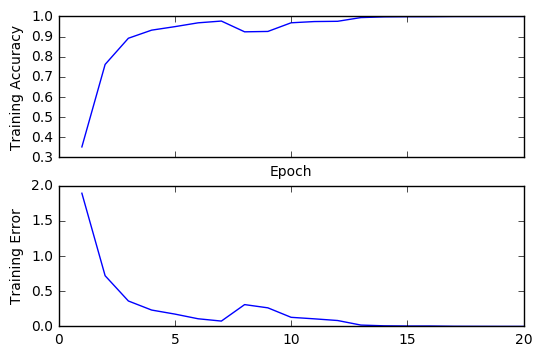

In [25]:
plot_training_history(history)

# Adam (Adaptive Learning Rate + Momentum)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [27]:
%%time
history = train_and_show_result(model)

Epoch 1/20
7s - loss: 0.1571 - acc: 0.9591
Epoch 2/20
6s - loss: 0.1044 - acc: 0.9717
Epoch 3/20
6s - loss: 0.0796 - acc: 0.9790
Epoch 4/20
6s - loss: 0.0800 - acc: 0.9787
Epoch 5/20
6s - loss: 0.0614 - acc: 0.9848
Epoch 6/20
6s - loss: 0.0588 - acc: 0.9857
Epoch 7/20
6s - loss: 0.0681 - acc: 0.9833
Epoch 8/20
6s - loss: 0.0588 - acc: 0.9854
Epoch 9/20
6s - loss: 0.0611 - acc: 0.9856
Epoch 10/20
6s - loss: 0.0458 - acc: 0.9903
Epoch 11/20
6s - loss: 0.0540 - acc: 0.9869
Epoch 12/20
6s - loss: 0.0485 - acc: 0.9905
Epoch 13/20
6s - loss: 0.0305 - acc: 0.9938
Epoch 14/20
6s - loss: 0.0366 - acc: 0.9900
Epoch 15/20
8s - loss: 0.0323 - acc: 0.9918
Epoch 16/20
6s - loss: 0.0374 - acc: 0.9923
Epoch 17/20
6s - loss: 0.0265 - acc: 0.9940
Epoch 18/20
6s - loss: 0.0441 - acc: 0.9906
Epoch 19/20
7s - loss: 0.0449 - acc: 0.9912
Epoch 20/20
7s - loss: 0.0520 - acc: 0.9900
1000/1000 [==============================] - 0s     

--------------------
Total Testing Loss:  0.955 
Testing Accuracy:  0.955
C

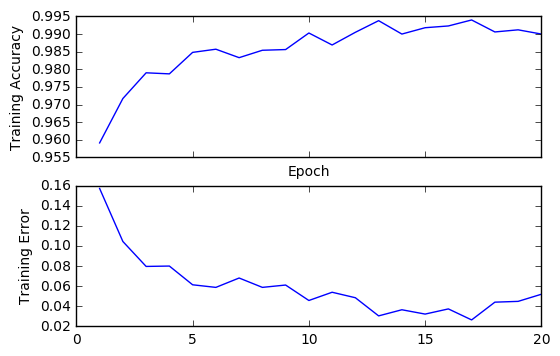

In [28]:
plot_training_history(history)

# Dropout

In [29]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [31]:
%%time
history = train_and_show_result(model)

Epoch 1/20
8s - loss: 4.6935 - acc: 0.1043
Epoch 2/20
7s - loss: 2.3158 - acc: 0.1126
Epoch 3/20
7s - loss: 2.1989 - acc: 0.1764
Epoch 4/20
7s - loss: 2.0891 - acc: 0.2305
Epoch 5/20
7s - loss: 2.0010 - acc: 0.2434
Epoch 6/20
7s - loss: 1.9464 - acc: 0.2467
Epoch 7/20
7s - loss: 1.9142 - acc: 0.2520
Epoch 8/20
7s - loss: 1.8728 - acc: 0.2585
Epoch 9/20
7s - loss: 1.8487 - acc: 0.2661
Epoch 10/20
7s - loss: 1.8289 - acc: 0.2798
Epoch 11/20
7s - loss: 1.8228 - acc: 0.2717
Epoch 12/20
7s - loss: 1.7875 - acc: 0.2851
Epoch 13/20
7s - loss: 1.7819 - acc: 0.2755
Epoch 14/20
7s - loss: 1.7769 - acc: 0.2778
Epoch 15/20
7s - loss: 1.7781 - acc: 0.2775
Epoch 16/20
7s - loss: 1.7565 - acc: 0.2821
Epoch 17/20
7s - loss: 1.7506 - acc: 0.2902
Epoch 18/20
7s - loss: 1.7331 - acc: 0.2994
Epoch 19/20
7s - loss: 1.7222 - acc: 0.2955
Epoch 20/20
7s - loss: 1.7148 - acc: 0.3085
 992/1000 [============================>.] - ETA: 0s
--------------------
Total Testing Loss:  0.126 
Testing Accuracy:  0.126
CP

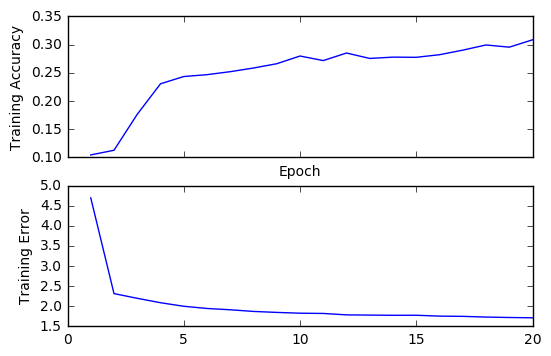

In [32]:
plot_training_history(history)